<a href="https://colab.research.google.com/github/rindanh/Latihan-NDSC/blob/main/netflix/rinda/Belajar_NDSC_Netflix_Danu_edited_by_Rinda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

## Load data

### Use this cells if you use Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os

dir_path = '/content/drive/My Drive/LOMBA NDSC Shopee'

for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/LOMBA NDSC Shopee/netflix/netflix_titles.csv
/content/drive/My Drive/LOMBA NDSC Shopee/netflix/Belajar NDSC.ipynb
/content/drive/My Drive/LOMBA NDSC Shopee/netflix/netflix_titles.xlsx
/content/drive/My Drive/LOMBA NDSC Shopee/netflix/netflix_titles_dirfiltered.xlsx
/content/drive/My Drive/LOMBA NDSC Shopee/netflix/Netflix - Latihan NDSC Rinda.ipynb
/content/drive/My Drive/LOMBA NDSC Shopee/netflix/Latihan NDSC 7-11.ipynb
/content/drive/My Drive/LOMBA NDSC Shopee/netflix/Belajar NDSC - Netflix - Danu edited by Rinda.ipynb
/content/drive/My Drive/LOMBA NDSC Shopee/netflix/Task Zeva.ipynb


In [ ]:
df = pd.read_csv(dir_path + '/netflix/netflix_titles.csv')

### Use this cell if you don't use Google Colab

In [ ]:
df = pd.read_csv("netflix_titles.csv")

### Use this cell if the source is from Github

In [30]:
url = 'https://raw.githubusercontent.com/rindanh/Latihan-NDSC/main/netflix/netflix_titles.csv'
df = pd.read_csv(url)

## Data Preview

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


This dataset contains 6234 rows with 12 columns. There are some columns that contains null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


Cell below shows another way to check null values. There are 2460 rows that contains null values. This code shows the number of non-null values that each column has among rows that contains null value

In [ ]:
df[df.isnull().any(axis=1)].count()

show_id         2460
type            2460
title           2460
director         491
cast            1890
country         1984
date_added      2449
release_year    2460
rating          2450
duration        2460
listed_in       2460
description     2460
dtype: int64

## Data Examination

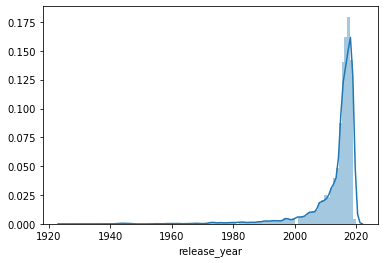

In [ ]:
sns.distplot(df.release_year, bins=100)

In [ ]:
df.director.value_counts()

Raúl Campos, Jan Suter             18
Marcus Raboy                       14
Jay Karas                          13
Jay Chapman                        12
Steven Spielberg                    9
                                   ..
Michael James Regan                 1
Aaron Hann, Mario Miscione          1
Francesco Carrozzini                1
Jesse V. Johnson, Jesse Johnson     1
Sara Colangelo                      1
Name: director, Length: 3301, dtype: int64

In [ ]:
# ini tuh nampilin tabel yg tiap rownya ada nan value
df[df.isnull().any(axis=1)].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."


## Analisa Tahun

### a. Tahun >2000 terbilang film baru

In [ ]:
baru = df[df.release_year >= 2000]

In [ ]:
baru.rating.value_counts()

TV-MA       1987
TV-14       1622
TV-PG        646
R            437
PG-13        239
NR           194
TV-Y7        166
PG           156
TV-Y         140
TV-G         140
TV-Y7-FV      87
G             23
UR             6
NC-17          2
Name: rating, dtype: int64

In [ ]:
baru.listed_in.value_counts()

Documentaries                                           295
Stand-Up Comedy                                         260
Dramas, International Movies                            239
Dramas, Independent Movies, International Movies        180
Comedies, Dramas, International Movies                  167
                                                       ... 
Anime Series, Romantic TV Shows                           1
British TV Shows, Kids' TV, TV Dramas                     1
Comedies, Faith & Spirituality, Romantic Movies           1
Kids' TV, TV Dramas, Teen TV Shows                        1
Horror Movies, International Movies, Romantic Movies      1
Name: listed_in, Length: 421, dtype: int64

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Movie      3928
TV Show    1927
Name: type, dtype: int64


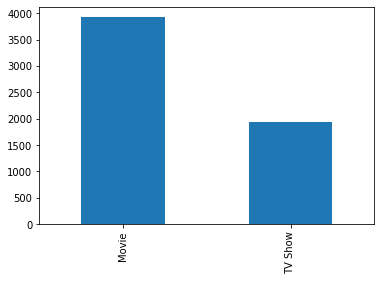

In [ ]:
print(baru.type.value_counts())
baru.type.value_counts().plot(kind="bar")

### b. Tahun <2000 terbilang jadul

In [ ]:
jadul = df[df.release_year < 2000]

In [ ]:
jadul.rating.value_counts()

TV-14       76
R           71
TV-PG       55
PG-13       47
TV-MA       40
PG          28
NR          24
G           14
TV-G         9
TV-Y7-FV     8
TV-Y         3
TV-Y7        3
UR           1
Name: rating, dtype: int64

In [ ]:
jadul.listed_in.value_counts()

Dramas                                                         17
Action & Adventure, International Movies                       14
Action & Adventure, Dramas, International Movies               13
Stand-Up Comedy                                                13
Classic Movies, Documentaries                                  11
                                                               ..
British TV Shows, Classic & Cult TV, International TV Shows     1
Comedies, Documentaries                                         1
Action & Adventure, Dramas                                      1
British TV Shows, Kids' TV, TV Comedies                         1
Classic Movies, Horror Movies, Thrillers                        1
Name: listed_in, Length: 121, dtype: int64

Movie      337
TV Show     42
Name: type, dtype: int64


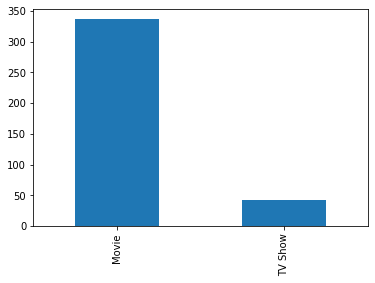

In [ ]:
print(jadul.type.value_counts())
jadul.type.value_counts().plot(kind="bar")

## Analisa Director

### Ternyata director Raúl Campos dan Jan Suter suka membuat acara Stand-Up Comedy

In [ ]:
df[df.director == "Raúl Campos, Jan Suter"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1337,80183088,Movie,Mea Culpa,"Raúl Campos, Jan Suter",Alexis de Anda,Mexico,"November 10, 2017",2017,TV-MA,54 min,Stand-Up Comedy,"Raw and outspoken, comedian Alexis de Anda bar..."
1655,80192137,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...
1794,80192065,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...
2035,80183197,Movie,Sofía Niño de Rivera: Selección Natural,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"March 30, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Mexico's Sofía Niño de Rivera brings her dark ...
2133,80192139,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,Argentina,"March 2, 2018",2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...
2134,80192063,Movie,Natalia Valdebenito: El especial,"Raúl Campos, Jan Suter",Natalia Valdebenito,Chile,"March 2, 2018",2018,TV-MA,69 min,Stand-Up Comedy,A Chilean comedian fuses activism with irrever...
2504,80191989,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...
2550,80097641,Movie,Sofía Niño de Rivera: Exposed,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"June 24, 2016",2016,TV-MA,80 min,Stand-Up Comedy,Self-deprecating comic Sofía Niño de Rivera pu...
2783,80192064,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,"July 6, 2018",2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...
2834,80192135,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good..."


### Ternyata director Marcus Raboy juga suka membuat acara Stand-Up Comedy

In [ ]:
df[df.director == "Marcus Raboy"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1052,80117461,Movie,"Dana Carvey: Straight White Male, 60",Marcus Raboy,Dana Carvey,United States,"November 4, 2016",2016,TV-MA,64 min,Stand-Up Comedy,Emmy-winning comedian Dana Carvey blends pitch...
1311,80191804,Movie,DeRay Davis: How to Act Black,Marcus Raboy,DeRay Davis,United States,"November 14, 2017",2017,TV-MA,66 min,Stand-Up Comedy,Dynamic comic DeRay Davis hits the stage like ...
1657,80186850,Movie,Steve Martin and Martin Short: An Evening You ...,Marcus Raboy,"Steve Martin, Martin Short",United States,"May 25, 2018",2018,TV-14,74 min,Stand-Up Comedy,Longtime pals and showbiz icons Steve Martin a...
2477,80237423,Movie,Miranda Sings Live…Your Welcome,Marcus Raboy,Colleen Ballinger,United States,"June 4, 2019",2019,TV-14,62 min,Stand-Up Comedy,Viral video star Miranda Sings and her real-wo...
2811,80213715,Movie,Whitney Cummings: Can I Touch It?,Marcus Raboy,Whitney Cummings,NaN,"July 30, 2019",2019,TV-MA,59 min,Stand-Up Comedy,"In her fourth stand-up special, Whitney Cummin..."
2820,70250364,Movie,Katt Williams: Kattpacalypse,Marcus Raboy,Katt Williams,United States,"July 3, 2018",2012,NR,61 min,Stand-Up Comedy,Urban comic Katt Williams ushers in Kattpacaly...
3305,80117453,Movie,Cristela Alonzo: Lower Classy,Marcus Raboy,Cristela Alonzo,United States,"January 24, 2017",2017,TV-MA,67 min,Stand-Up Comedy,The irrepressible Alonzo skewers Latino stereo...
3821,80134779,Movie,Marlon Wayans: Woke-ish,Marcus Raboy,Marlon Wayans,United States,"February 27, 2018",2018,TV-MA,67 min,Stand-Up Comedy,"Rollicking, outrageous and audacious, Marlon W..."
4591,80158871,Movie,Judd Apatow: The Return,Marcus Raboy,Judd Apatow,United States,"December 12, 2017",2017,TV-MA,70 min,Stand-Up Comedy,Judd Apatow returns to stand-up comedy after 2...
4601,80995991,Movie,Vir Das: Losing It,Marcus Raboy,Vir Das,NaN,"December 11, 2018",2018,TV-MA,68 min,Stand-Up Comedy,"The world's got a lot of problems, but Vir Das..."


### ---------------------------------------------------------------------------------------------------------------------------------------------------------

## Yang mungkin bisa dicari (PR dari danu):
### 1. Tiap "listed_in" itu rata-rata durasinya berapa lama? (DONE, tp listed_in per row masih > 1 kategori)
### 2. Tiap director itu sering buat rating acara yang gimana? (DONE, tp director per row masih > 1 orang)
### 3. Tiap director kira-kira ada ga ya cast andalan? (harus pecah dulu cast per row nya)
### 4. Kenapa ya masih ada missing value di director padahal yang blank udah dikosongin? (DONE by do nothing)

tambahan analisis dari rinda
- kelompokin title per negara (pisahin dulu negaranya) (DONE by raihan di zeva)
- visualisasi release date per bulan (tidak mungkin dilakukan)

## Analisa durasi per listed_in
Analisis durasi per listed_in dibedakan sesuai dengan type, yaitu antara Movie dan TV Show

### Movie

In [5]:
df_movie = df[df.type == 'Movie']
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


#### Change duration from string to number
the unit of the duration is per minute

In [6]:
def convert_duration_min(dur_str):
    return int(dur_str[:-4])

In [7]:
df_movie['duration'] = df_movie['duration'].apply(convert_duration_min)
df_movie.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


after the duration is converted to integer, we can see the description below

In [64]:
df_movie.describe()[['duration']]

,duration
count,4265.000000
mean,99.100821
std,28.074857
min,3.000000
25%,86.000000
50%,98.000000
75%,115.000000
max,312.000000


#### Get Average Duration per listed_in
to-do: pecah listed_in berdasarkan koma

In [9]:
df_movie.groupby('listed_in').mean()[['duration']]

,duration
listed_in,
Action & Adventure,105.014706
"Action & Adventure, Anime Features, Children & Family Movies",107.000000
"Action & Adventure, Anime Features, Classic Movies",100.000000
"Action & Adventure, Anime Features, Horror Movies",96.000000
"Action & Adventure, Anime Features, International Movies",90.200000
...,...
Sci-Fi & Fantasy,95.000000
"Sci-Fi & Fantasy, Thrillers",110.444444
Sports Movies,87.000000


In [16]:
len(df_movie['listed_in'].unique())

249

Pecah listedin

In [16]:
df_movie_listed_str = ', '.join(df_movie['listed_in'])
df_movie_listed_list = list(set(df_movie_listed_str.split(', ')))
df_movie_listed_list

['International Movies',
 'Comedies',
 'Sci-Fi & Fantasy',
 'Anime Features',
 'Horror Movies',
 'Movies',
 'Faith & Spirituality',
 'Documentaries',
 'Music & Musicals',
 'Thrillers',
 'LGBTQ Movies',
 'Classic Movies',
 'Romantic Movies',
 'Children & Family Movies',
 'Stand-Up Comedy',
 'Independent Movies',
 'Dramas',
 'Action & Adventure',
 'Sports Movies',
 'Cult Movies']

In [27]:
df_movie[df_movie['listed_in'].str.contains(df_movie_listed_list[0])]['duration'].mean()

movie_listedin_duration = []
for li in df_movie_listed_list:
    movie_listedin_duration.append((li, df_movie[df_movie['listed_in'].str.contains(li)]['duration'].mean()))

df_movie_listedin_duration = pd.DataFrame(movie_listedin_duration, columns=['listed_in', 'avg_duration'])    
df_movie_listedin_duration

,listed_in,avg_duration
0,International Movies,110.977167
1,Comedies,103.761905
2,Sci-Fi & Fantasy,106.683938
3,Anime Features,92.844444
4,Horror Movies,97.339695
5,Movies,102.972367
6,Faith & Spirituality,104.914894
7,Documentaries,81.000000
8,Music & Musicals,110.477366
9,Thrillers,106.301020


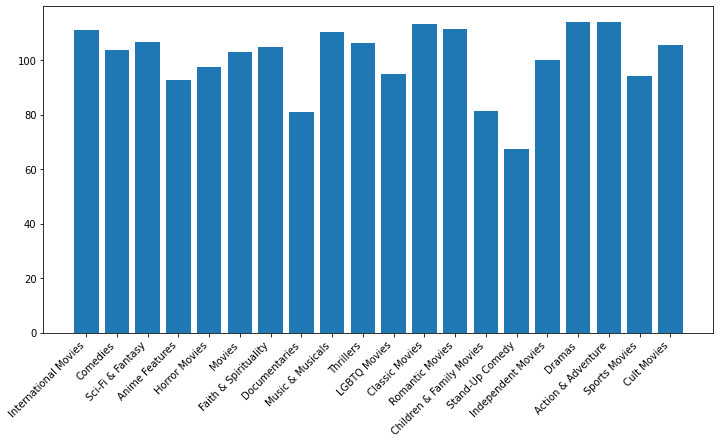

In [84]:
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(np.arange(len(df_movie_listedin_duration)), height=df_movie_listedin_duration['avg_duration'])
ax.set_xticks(np.arange(len(df_movie_listedin_duration)))
ax.set_xticklabels(df_movie_listedin_duration['listed_in'], rotation=45, ha="right")
    
plt.show()

### TV Show

In [66]:
df_tvshow = df[df.type == 'TV Show']
df_tvshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


#### Change duration from string to number
the unit of the duration is per season

In [67]:
def convert_duration_season(dur_str):
    return int(dur_str[:-7])

In [68]:
df_tvshow['duration'] = df_tvshow['duration'].apply(convert_duration_season)
df_tvshow.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


after the duration is converted to integer, we can see the description below

In [69]:
df_tvshow.describe()

,show_id,release_year,duration
count,1.969000e+03,1969.000000,1969.000000
mean,7.904892e+07,2015.536313,1.779584
std,3.462549e+06,5.799568,1.624936
min,6.003679e+07,1925.000000,1.000000
25%,8.009178e+07,2015.000000,1.000000
50%,8.017572e+07,2017.000000,1.000000
75%,8.023986e+07,2018.000000,2.000000
max,8.123560e+07,2020.000000,15.000000


1     1321
2      304
3      158
4       61
5       46
6       22
7       21
8       16
9        7
11       3
10       3
15       2
13       2
12       2
14       1
Name: duration, dtype: int64


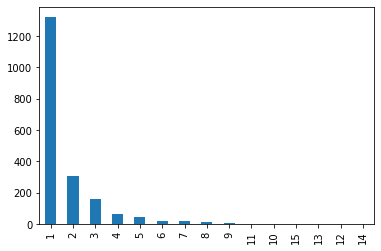

In [70]:
print(df_tvshow.duration.value_counts())
df_tvshow.duration.value_counts().plot(kind="bar")

#### Get Average Duration per listed_in
to-do: pecah listed_in berdasarkan koma

In [71]:
df_tvshow.groupby('listed_in').mean()[['duration']]

,duration
listed_in,
Anime Series,1.500000
"Anime Series, Crime TV Shows",1.333333
"Anime Series, Crime TV Shows, International TV Shows",1.142857
"Anime Series, Crime TV Shows, TV Thrillers",1.000000
"Anime Series, International TV Shows",1.677419
...,...
"TV Horror, TV Mysteries, TV Thrillers",4.666667
"TV Horror, TV Mysteries, Teen TV Shows",1.000000
"TV Horror, Teen TV Shows",1.000000


In [72]:
df_tvshow_listed_str = ', '.join(df_tvshow['listed_in'])
df_tvshow_listed_list = list(set(df_tvshow_listed_str.split(', ')))
len(df_tvshow_listed_list)

22

In [73]:
df_tvshow[df_tvshow['listed_in'].str.contains(df_tvshow_listed_list[0])]['duration'].mean()

tvshow_listedin_duration = []
for li in df_tvshow_listed_list:
    tvshow_listedin_duration.append((li, df_tvshow[df_tvshow['listed_in'].str.contains(li)]['duration'].mean()))

df_tvshow_listedin_duration = pd.DataFrame(tvshow_listedin_duration, columns=['listed_in', 'avg_duration'])    
df_tvshow_listedin_duration

,listed_in,avg_duration
0,Anime Series,1.589744
1,Spanish-Language TV Shows,1.547009
2,Korean TV Shows,1.219697
3,Science & Nature TV,1.343284
4,TV Mysteries,2.391304
5,Stand-Up Comedy & Talk Shows,1.880952
6,Crime TV Shows,1.757576
7,Classic & Cult TV,5.833333
8,International TV Shows,1.371628
9,Romantic TV Shows,1.435252


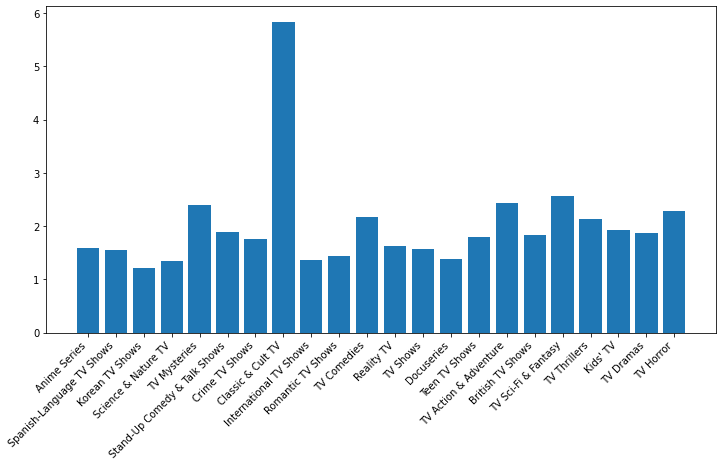

In [85]:
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(np.arange(len(df_tvshow_listedin_duration)), height=df_tvshow_listedin_duration['avg_duration'])
ax.set_xticks(np.arange(len(df_tvshow_listedin_duration)))
ax.set_xticklabels(df_tvshow_listedin_duration['listed_in'], rotation=45, ha="right")
    
plt.show()

## Analisis rating per director

### Fill null values on column rating with 'unknown'

In [31]:
df['rating'] = df.rating.fillna('unknown')

### Show the combination of each director and each rating 

In [62]:
rating_per_director = (df.groupby(['director', 'rating'])['rating'].count().unstack().fillna(0)).astype(int)
rating_per_director['total'] = df.groupby('director')['rating'].count()
rating_per_director['most_rating'] = (rating_per_director.loc[:, rating_per_director.columns!='total']).idxmax(axis=1)

rating_per_director.sort_values(['total'], ascending=False)

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR,unknown,total,most_rating
director,,,,,,,,,,,,,,,,,
"Raúl Campos, Jan Suter",0,0,0,0,0,0,1,0,17,0,0,0,0,0,0,18,TV-MA
Marcus Raboy,0,0,1,0,0,0,3,0,10,0,0,0,0,0,0,14,TV-MA
Jay Karas,0,0,2,0,0,0,3,0,8,0,0,0,0,0,0,13,TV-MA
Jay Chapman,0,0,1,0,0,0,1,0,10,0,0,0,0,0,0,12,TV-MA
Steven Spielberg,0,0,0,3,5,1,0,0,0,0,0,0,0,0,0,9,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
John Michael McDonagh,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,R
"John Mikulak, Joshua Brown",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,TV-14
John Milius,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,PG-13


In [91]:
len(df.director.unique())

3302

In [90]:
df['director'] = df.director.fillna('unknown')

In [93]:
directors_str = ', '.join(df['director'])
directors = list(set(directors_str.split(', ')))
len(directors)

3656

In [99]:
df['cast'] = df.cast.fillna('unknown')

In [101]:
len(df.cast.unique())

5470

In [102]:
casts_str = ', '.join(df['cast'])
casts = list(set(casts_str.split(', ')))
len(casts)

27406

In [107]:
cast_per_director = (df.groupby(['director', 'cast'])['cast'].count().unstack().fillna(0)).astype(int)
cast_per_director['total'] = df.groupby('director')['cast'].count()
cast_per_director['most_casted'] = (cast_per_director.loc[:, cast_per_director.columns!='total']).idxmax(axis=1)
cast_per_director['most_casted_sum'] = (cast_per_director.loc[:, cast_per_director.columns!='total']).max(axis=1)

cast_per_director[['total', 'most_casted', 'most_casted_sum']].sort_values(['total'], ascending=False)

cast,total,most_casted,most_casted_sum
director,,,
unknown,1969,unknown,214
"Raúl Campos, Jan Suter",18,Sofía Niño de Rivera,2
Marcus Raboy,14,Vir Das,2
Jay Karas,13,Bill Burr,3
Jay Chapman,12,D.L. Hughley,2
...,...,...,...
"John Mikulak, Joshua Brown",1,"Jan Lewan, Greg Korin",1
John Milius,1,"Patrick Swayze, C. Thomas Howell, Lea Thompson...",1
John Murlowski,1,"Joel Courtney, Calum Worthy, Andi Matichak, Ka...",1


In [ ]:
df_tvshow[df_tvshow['listed_in'].str.contains(df_tvshow_listed_list[0])]['duration'].mean()

tvshow_listedin_duration = []
for li in df_tvshow_listed_list:
    tvshow_listedin_duration.append((li, df_tvshow[df_tvshow['listed_in'].str.contains(li)]['duration'].mean()))

df_tvshow_listedin_duration = pd.DataFrame(tvshow_listedin_duration, columns=['listed_in', 'avg_duration'])    
df_tvshow_listedin_duration

,listed_in,avg_duration
0,Anime Series,1.589744
1,Spanish-Language TV Shows,1.547009
2,Korean TV Shows,1.219697
3,Science & Nature TV,1.343284
4,TV Mysteries,2.391304
5,Stand-Up Comedy & Talk Shows,1.880952
6,Crime TV Shows,1.757576
7,Classic & Cult TV,5.833333
8,International TV Shows,1.371628
9,Romantic TV Shows,1.435252


## Cast andalan per director

In [86]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
